2.1 Implementation of MySQL connection using Python

In [ ]:
#pip install mysql-connector-python "install myqsl using this command"


import sys
sys.path.append('C:\\Users\\vargh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\python312\\site-packages')
import mysql.connector
from mysql.connector import Error

# Function to create a MySQL connection
def create_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("Connection to MySQL DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

# Function to execute a single query (e.g., creating a table)
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

# Function to execute a read query (e.g., selecting data)
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

# Step 3: Create Connection
connection = create_connection("localhost", "root", "", "new_mysql")

# Step 4: Create a Table
create_table_query = """
CREATE TABLE IF NOT EXISTS users (
    id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(100) NOT NULL,
    age INT,
    gender VARCHAR(10),
    nationality VARCHAR(50)
);
"""
execute_query(connection, create_table_query)

# Step 5: Insert Data
insert_user_query = """
INSERT INTO users (name, age, gender, nationality) VALUES
('John Doe', 28, 'Male', 'USA'),
('Jane Smith', 25, 'Female', 'Canada');
"""
execute_query(connection, insert_user_query)

# Step 6: Select Data
select_users_query = "SELECT * FROM users"
users = execute_read_query(connection, select_users_query)

for user in users:
    print(user)


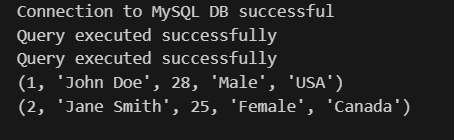

2.2. Implementation of SqLite3 connection using Python

In [2]:
import sqlite3
from sqlite3 import Error

# Function to create a connection to the SQLite database
def create_connection(db_file):
    connection = None
    try:
        connection = sqlite3.connect(db_file)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

# Function to execute a single query (CREATE, UPDATE, DELETE)
def execute_query(connection, query, data=None):
    cursor = connection.cursor()
    try:
        if data:
            cursor.execute(query, data)
        else:
            cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

# Function to execute a read query (SELECT)
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

# Step 2: Create Connection
connection = create_connection("test_database.sqlite")

# Step 3: Create a Table
create_table_query = """
CREATE TABLE IF NOT EXISTS users (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    age INTEGER,
    gender TEXT,
    nationality TEXT
);
"""
execute_query(connection, create_table_query)

# Step 4: Insert Data (Create)
insert_user_query = """
INSERT INTO users (name, age, gender, nationality)
VALUES (?, ?, ?, ?)
"""
user_data = ("John Doe", 28, "Male", "USA")
execute_query(connection, insert_user_query, user_data)

# Step 5: Select Data (Read)
select_users_query = "SELECT * FROM users"
users = execute_read_query(connection, select_users_query)

print("Users in the database:")
for user in users:
    print(user)

# Step 6: Update Data (Update)
update_user_query = """
UPDATE users
SET age = ?
WHERE name = ?
"""
updated_data = (35, "John Doe")
execute_query(connection, update_user_query, updated_data)

# Step 7: Delete Data (Delete)
delete_user_query = "DELETE FROM users WHERE name = ?"
delete_user_data = ("John Doe",)
execute_query(connection, delete_user_query, delete_user_data)

# Step 8: Confirm deletion
users = execute_read_query(connection, select_users_query)
print("Users after deletion:")
for user in users:
    print(user)


Connection to SQLite DB successful
Query executed successfully
Query executed successfully
Users in the database:
(1, 'John Doe', 28, 'Male', 'USA')
Query executed successfully
Query executed successfully
Users after deletion:


2.3 Write a program to implement CRUD operations using Python

In [7]:
import sqlite3
from sqlite3 import Error

# Function to create a SQLite connection
def create_connection(db_file):
    connection = None
    try:
        connection = sqlite3.connect(db_file)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

# Function to execute a single query (CREATE, UPDATE, DELETE)
def execute_query(connection, query, data=None):
    cursor = connection.cursor()
    try:
        if data:
            cursor.execute(query, data)
        else:
            cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

# Function to execute a read query (SELECT)
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

# Establishing connection to SQLite database (DB will be created if it doesn't exist)
connection = create_connection("crud_db.sqlite")

# Step 1: Create Table
create_users_table = """
CREATE TABLE IF NOT EXISTS users (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    age INTEGER,
    gender TEXT,
    nationality TEXT
);
"""
execute_query(connection, create_users_table)

# Step 2: Create (Insert Data)
insert_user_query = """
INSERT INTO users (name, age, gender, nationality) VALUES (?, ?, ?, ?)
"""
user_data = ("Alice", 30, "Female", "USA")
execute_query(connection, insert_user_query, user_data)

# Step 3: Read (Select Data)
select_users_query = "SELECT * FROM users"
users = execute_read_query(connection, select_users_query)
print("Users in the database:")
for user in users:
    print(user)

# Step 4: Update (Modify Data)
update_user_query = """
UPDATE users
SET age = ?
WHERE name = ?
"""
updated_data = (35, "Alice")
execute_query(connection, update_user_query, updated_data)

# Step 5: Read again to confirm update
users = execute_read_query(connection, select_users_query)
print("Users after update:")
for user in users:
    print(user)

# Step 6: Delete (Remove Data)
delete_user_query = "DELETE FROM users WHERE name = ?"
delete_user_data = ("Alice",)
execute_query(connection, delete_user_query, delete_user_data)

# Step 7: Read again to confirm deletion
users = execute_read_query(connection, select_users_query)
print("Users after deletion:")
for user in users:
    print(user)


Connection to SQLite DB successful
Query executed successfully
Query executed successfully
Users in the database:
(1, 'Alice', 30, 'Female', 'USA')
Query executed successfully
Users after update:
(1, 'Alice', 35, 'Female', 'USA')
Query executed successfully
Users after deletion:
